# Hierarchical Clustering

To cluster cars from a dataset based on their features

Import the necessary datasets (make sure you have installed `plotly` before running this):

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pickle

from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

Get the dataset and get a sample:

In [2]:
df = pd.read_csv("../datasets/cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


And description:

In [3]:
df.describe()

,partition
count,159.000000
mean,0.012579
std,0.111799
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


As is visible, there are a lot of null and invalid values in the dataset. So we need to process the dataset to fix these issues:

In [4]:
df[list(df.columns)[2:-1]] = df[list(df.columns)[2:-1]].apply(pd.to_numeric, errors="coerce")
df = df.dropna().reset_index(drop=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


Separate the features of interest into a different dataset and normalize its values:

In [5]:
feature_df = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']].values
feature_df = MinMaxScaler().fit_transform(feature_df)

Create the dataset distance matrix based on this feature set:

In [6]:
dist_matrix = distance_matrix(feature_df, feature_df)
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

Use this distance matrix to create the cluster model (I initialized the model with 6 clusters just to keep the results same as solutions notebook, make sure you play around with this number and see what changes):

In [7]:
model = AgglomerativeClustering(n_clusters=6, linkage='complete')
model.fit(feature_df)

AgglomerativeClustering(linkage='complete', n_clusters=6)

Add the model's predicted labels to the original dataset:

In [8]:
df['labels'] = model.labels_

Use these labels to create a dendogram of the dataset:

<ipython-input-9-db7515667e3e>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  data = linkage(dist_matrix, 'complete')


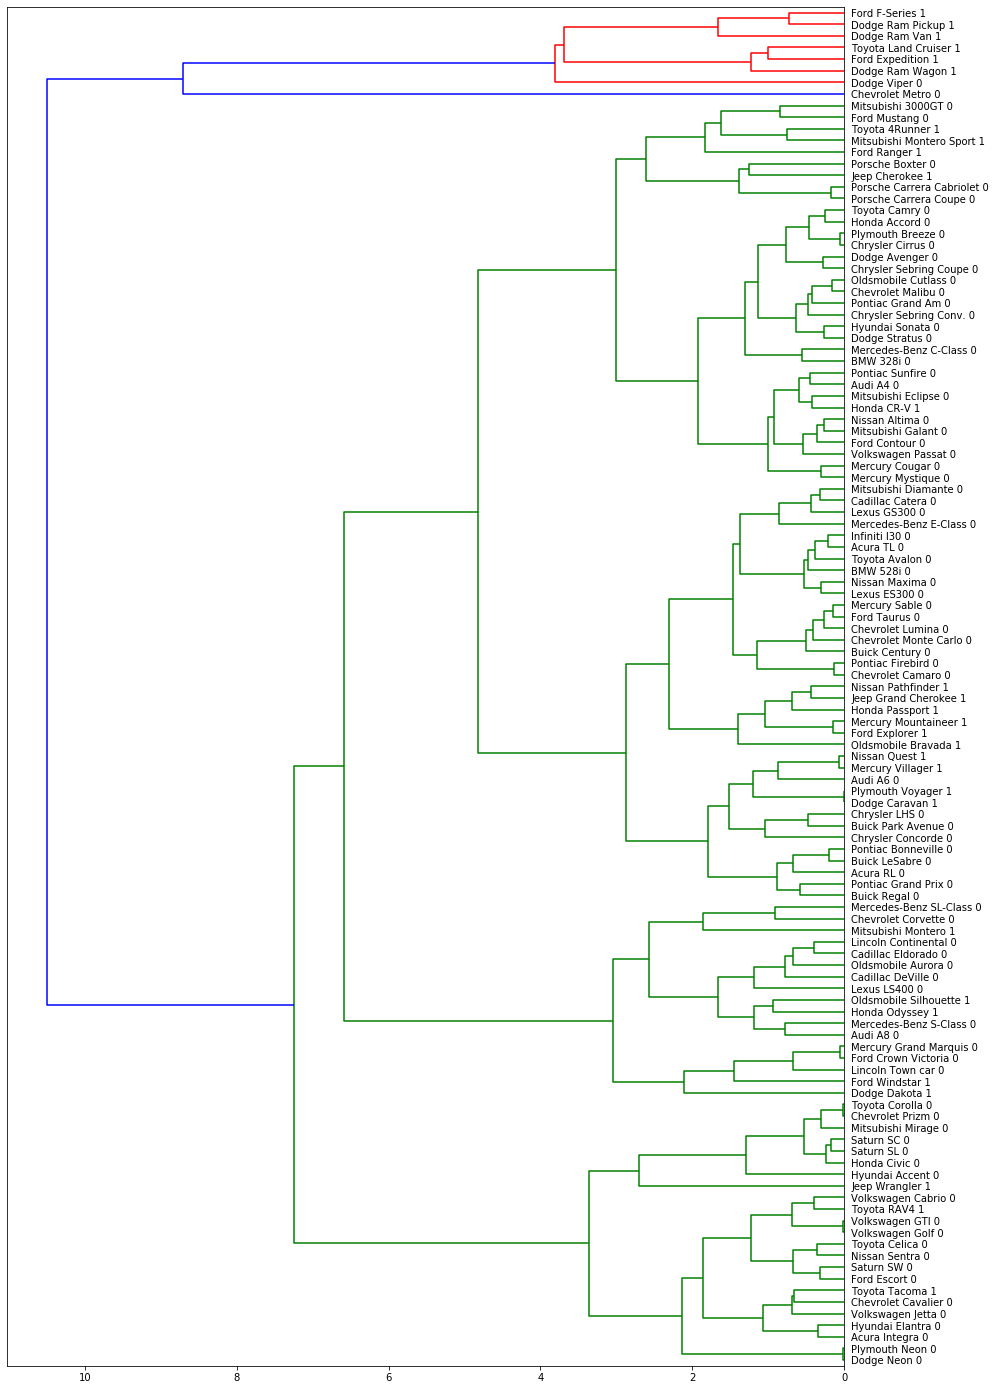

In [9]:
## use the following code to ignore ClusterWarning
# from scipy.cluster.hierarchy import ClusterWarning
# from warnings import simplefilter
# simplefilter("ignore", ClusterWarning)

plt.figure(figsize=(15, 25))
data = linkage(dist_matrix, 'complete')
fig = dendrogram(data,
           leaf_label_func=lambda x: "{} {} {}".format(df['manufact'][x], df['model'][x], int(df['type'][x])),
           leaf_rotation=0,
           leaf_font_size=10,
           orientation="left")
plt.show()

Also, let's get a scatter plot of the dataset to see how the data was categorized:

In [10]:
data = go.Scatter(x=df['horsepow'],
                  y=df['mpg'],
                  marker={"color": df["labels"],
                          "size": 15,
                          "colorscale": "rainbow",
                          "opacity": 0.5},
                 mode="markers",
                 hovertext=df["model"])
figure = go.Figure(data, layout_title_text="Heirarchical Clustering")
figure.show(renderer="browser")

Now, let's separate the dataset based on vehicle type (cars and trucks):

In [11]:
df_sep = df.groupby(['labels', 'type'], as_index=False)[['horsepow','engine_s','mpg','price']].mean()
df_sep

,labels,type,horsepow,engine_s,mpg,price
0,0,1.0,211.666667,4.483333,16.166667,29.024667
1,1,0.0,146.531915,2.246809,27.021277,20.306128
2,1,1.0,145.000000,2.580000,22.200000,17.009200
3,2,0.0,203.111111,3.303704,24.214815,27.750593
4,2,1.0,182.090909,3.345455,20.181818,26.265364
5,3,0.0,256.500000,4.410000,21.500000,42.870400
6,3,1.0,160.571429,3.071429,21.428571,21.527714
7,4,0.0,55.000000,1.000000,45.000000,9.235000
8,5,0.0,365.666667,6.233333,19.333333,66.010000


and plot this dataset as an interactive plot (as the points are colored by label, you will see 2 points with the same color. Hover over the point to see vehicle type):

In [12]:
data = go.Scatter(x=df_sep['horsepow'],
                  y=df_sep['mpg'],
                  marker={"color": df_sep['labels'],
                          "size": 15,
                          "colorscale": "rainbow",
                          "opacity": 0.5},
                 mode="markers",
                 hovertext=df_sep["type"])
figure = go.Figure(data, layout_title_text="Heirarchical Clustering")
figure.show(renderer="browser")

Finally, save the model:

In [13]:
pickle.dump(model, open("../saved_models/model_10.sav", "wb"))